In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_train.csv'
x_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_test.csv'
x_test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_train.csv'
y_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_test.csv'
y_test = pd.read_csv(url)


In [3]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [4]:
knr.score(x_test, y_test)

0.18122793802387072

KNN Grid Search

In [5]:
nums = np.arange(1,50).tolist()
scores = []
for i in range(len(nums)):
  knr = KNeighborsRegressor(n_neighbors=i+1)
  knr.fit(x_train, y_train)
  scores.append(knr.score(x_test, y_test))


Text(0, 0.5, 'Model Score')

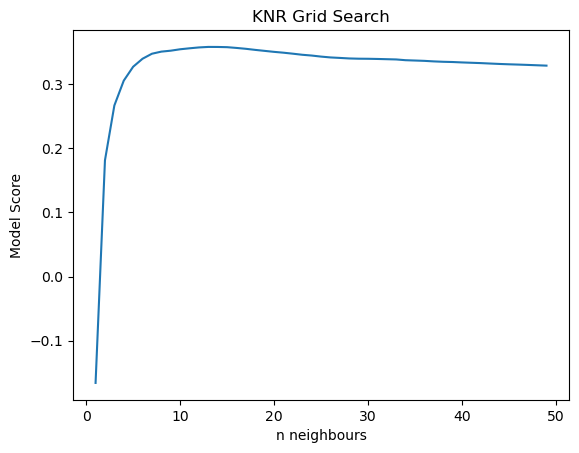

In [6]:
plt.plot(nums, scores)
plt.title('KNR Grid Search')
plt.xlabel('n neighbours')
plt.ylabel('Model Score')

In [9]:
np.argmax(scores)

12

In [10]:
scores[12]

0.3579534617593637

In [ ]:
#import submission test dataset 
url = ''
test = pd.read_csv(url)